오차 (Error)

정확도의 함정

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
cancer = load_breast_cancer()

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

target: 0: 악성종양, 1:양성종양

In [5]:
data = cancer['data']
target = cancer['target']
feature_names=cancer['feature_names']

In [8]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
pos = df.loc[df['target']==1] # 양성인 애들만 뽑아서 df
neg = df.loc[df['target']==0] # 음성인 애들만 뽑아서 df

In [17]:
pos.count()

mean radius                357
mean texture               357
mean perimeter             357
mean area                  357
mean smoothness            357
mean compactness           357
mean concavity             357
mean concave points        357
mean symmetry              357
mean fractal dimension     357
radius error               357
texture error              357
perimeter error            357
area error                 357
smoothness error           357
compactness error          357
concavity error            357
concave points error       357
symmetry error             357
fractal dimension error    357
worst radius               357
worst texture              357
worst perimeter            357
worst area                 357
worst smoothness           357
worst compactness          357
worst concavity            357
worst concave points       357
worst symmetry             357
worst fractal dimension    357
target                     357
dtype: int64

In [16]:
neg.count()

mean radius                212
mean texture               212
mean perimeter             212
mean area                  212
mean smoothness            212
mean compactness           212
mean concavity             212
mean concave points        212
mean symmetry              212
mean fractal dimension     212
radius error               212
texture error              212
perimeter error            212
area error                 212
smoothness error           212
compactness error          212
concavity error            212
concave points error       212
symmetry error             212
fractal dimension error    212
worst radius               212
worst texture              212
worst perimeter            212
worst area                 212
worst smoothness           212
worst compactness          212
worst concavity            212
worst concave points       212
worst symmetry             212
worst fractal dimension    212
target                     212
dtype: int64

임의로 데이터셋 바꿈

양성은 357개 다 쓰고, 악성은 212개중에 5개만 사용

concat을 이용헤 pos에 neg의 위에서 5row만 붙이

In [20]:
sample = pd.concat([pos, neg[:5]], sort=True)

In [21]:
sample

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
19,23.560,0.014600,0.013150,0.02387,0.002300,566.3,0.08129,0.047810,0.06664,0.05766,...,711.2,0.17730,0.12880,0.23900,0.07259,99.70,15.110,0.14400,0.2977,19.26
20,14.670,0.018980,0.006490,0.01698,0.002425,520.0,0.12700,0.031100,0.04568,0.06811,...,630.5,0.27760,0.07283,0.18900,0.08183,96.09,14.500,0.13120,0.3184,20.49
21,15.700,0.014320,0.014210,0.01985,0.002968,273.9,0.06492,0.020760,0.02956,0.06905,...,314.9,0.11480,0.06227,0.08867,0.07773,65.13,10.230,0.13240,0.2450,15.66
37,14.160,0.004899,0.011640,0.01343,0.001777,523.8,0.03766,0.029230,0.02562,0.05863,...,545.9,0.04619,0.05013,0.04833,0.06169,84.46,13.300,0.09701,0.1987,22.81
46,8.205,0.016460,0.005917,0.01588,0.002582,201.9,0.05943,0.005917,0.01588,0.06503,...,242.2,0.13570,0.02564,0.06880,0.07409,57.26,8.964,0.12970,0.3105,21.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,153.400,0.049040,0.015870,0.05373,0.006193,1001.0,0.27760,0.147100,0.30010,0.07871,...,2019.0,0.66560,0.26540,0.71190,0.11890,184.60,25.380,0.16220,0.4601,17.33
1,74.080,0.013080,0.013400,0.01860,0.003532,1326.0,0.07864,0.070170,0.08690,0.05667,...,1956.0,0.18660,0.18600,0.24160,0.08902,158.80,24.990,0.12380,0.2750,23.41
2,94.030,0.040060,0.020580,0.03832,0.004571,1203.0,0.15990,0.127900,0.19740,0.05999,...,1709.0,0.42450,0.24300,0.45040,0.08758,152.50,23.570,0.14440,0.3613,25.53
3,27.230,0.074580,0.018670,0.05661,0.009208,386.1,0.28390,0.105200,0.24140,0.09744,...,567.7,0.86630,0.25750,0.68690,0.17300,98.87,14.910,0.20980,0.6638,26.50


In [22]:
x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', 1), sample['target'], random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [26]:
(pred == y_test).mean()

0.978021978021978

In [28]:
# 무조건 1로 예측

my_prediction = np.ones(shape=y_test.shape)

In [29]:
(my_prediction == y_test).mean()

0.989010989010989

머신러닝으로 돌리는 것 보다 걍 다 1로 예측하는게 정확도가 더 높게 나옴

정확도만 놓고 본다면, 제가 만든 무조건 음성 환자로 예측하는 분류기가 성능이 좋습니다

하지만, 의사가 과연 무조건 음성 환자로 예측해서 예측율 98.9% 로 말하는 의사는 자질이 좋은 의사일까요?

정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 위와 같은 오류에 빠질 수 있습니다.

이를 보완하고 생겨난 지표들이 있습니다. 차차 알아보겠습니다.


In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
confusion_matrix(y_test, pred)

array([[ 1,  0],
       [ 2, 88]], dtype=int64)

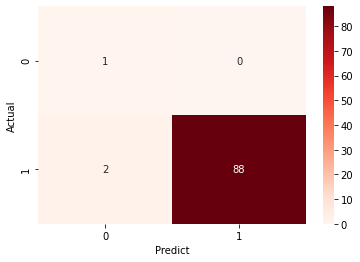

In [38]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Reds', )
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [41]:
from sklearn.metrics import precision_score, recall_score

In [42]:
precision_score(y_test, pred)

1.0

재현율 (recall)

TP / (TP + FN)

정확하게 감지한 양성 샘플의 비율입니다.

민감도 (sensitivity) 혹은 True Positive Rate (TPR)이라고도 불리웁니다.

In [43]:
recall_score(y_test, pred)

0.9777777777777777

f1 score

정밀도와 재현율의 조화 평균을 나타내는 지표입니다.

2∗정밀도∗재현율 / 정밀도+재현율 = TP / (TP + (FN+FP)/2)

In [44]:
from sklearn.metrics import f1_score

In [45]:
f1_score(y_test, pred)

0.9887640449438202